In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,silhouette_score, confusion_matrix, classification_report
from yellowbrick.cluster import KElbowVisualizer
import warnings
from statsmodels.tsa.arima.model import ARIMA

**Loading the data**

In [2]:
EV1 = pd.read_csv('./EV Dataset.csv')
EV2 = pd.read_csv('./ev_charger.csv')
EV3 = pd.read_excel('./ev_charging_station_dataset.xlsx')
EV4 = pd.read_csv('./EVIndia.csv')
EV5 = pd.read_csv('./indian_buying_behaviour.csv')
EV6 = pd.read_excel('./ev_sales_trend.xlsx')
Main = pd.read_csv('./ev_data.csv')

***Market Size for Personal EVs in India by 2025***

In [4]:
# Group data by year and sum total EVs sold
sales_data = EV6.groupby('YEAR').sum()['TOTAL']
sales_data

EV6['YEAR'] = pd.to_datetime(EV6['YEAR'], format='%Y-%m-%d')

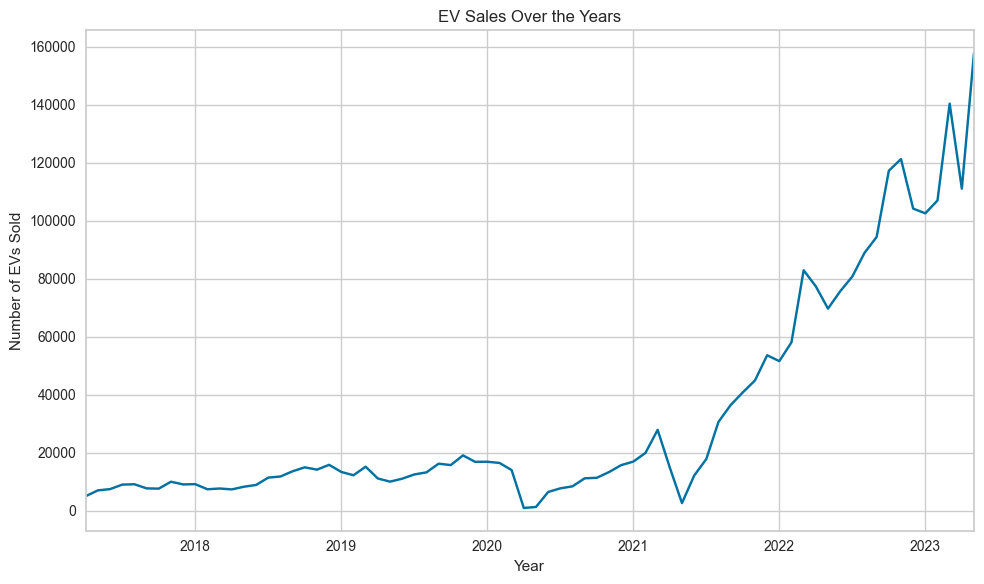

In [6]:
# Plot EV sales over the years
plt.figure(figsize=(10,6))
sales_data.plot(kind='line', title='EV Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of EVs Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

***Using Time-series Analysis to Forecast***

In [13]:
model = ARIMA(sales_data, order=(6, 2, 1))  # Adjust (p, d, q) parameters
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)  # Forecast for next 10 months
#print(forecast)

C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [14]:
combined_data = pd.concat([sales_data, forecast])

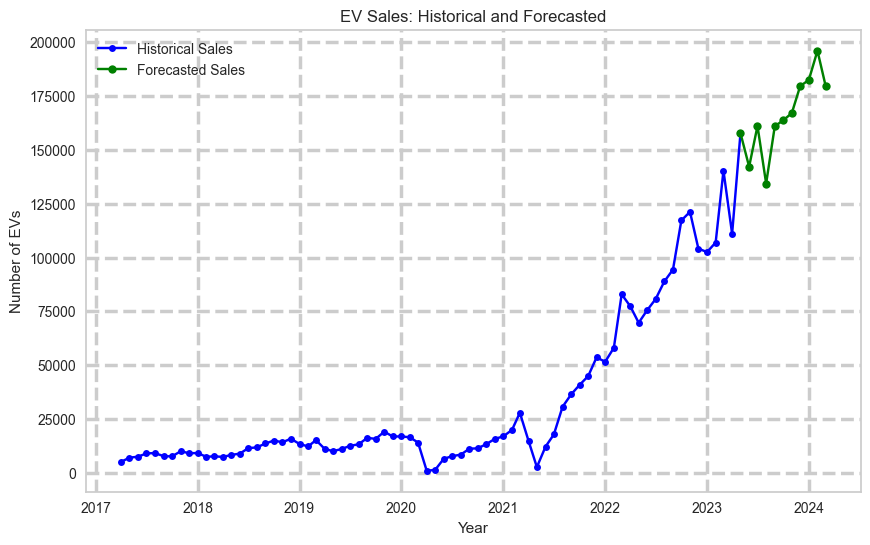

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(combined_data[:-10], marker='o',ms=5, label='Historical Sales', color='blue')
plt.plot(combined_data[-11:], marker='o', ms=6, label='Forecasted Sales', color='green')
plt.xlabel('Year')
plt.ylabel('Number of EVs')
plt.title('EV Sales: Historical and Forecasted')
plt.legend()
plt.grid(True, which='major', axis='both', linestyle = '--', linewidth = 2.5)
plt.show()

***Current Market segmentation for EV-4Wheelers in India***

In [19]:
Main.head(1)

,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,...,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total
0,2/1/2022,Andaman & Nicobar Island,GOODS CARRIER,Others,Others,0,15,0,0,0,...,0,0,1,0,0,0,0,0,0,16


In [20]:
Main.drop(columns=['Date'],inplace=True)

In [21]:
Main.isnull().sum()

State                  0
Vehicle Class          0
Vehicle Category       0
Vehicle Type           0
CNG ONLY               0
DIESEL                 0
DIESEL/HYBRID          0
DI-METHYL ETHER        0
DUAL DIESEL/BIO CNG    0
DUAL DIESEL/CNG        0
DUAL DIESEL/LNG        0
ELECTRIC(BOV)          0
ETHANOL                0
FUEL CELL HYDROGEN     0
LNG                    0
LPG ONLY               0
METHANOL               0
NOT APPLICABLE         0
PETROL                 0
PETROL/CNG             0
PETROL/ETHANOL         0
PETROL/HYBRID          0
PETROL/LPG             0
PETROL/METHANOL        0
SOLAR                  0
Total                  0
dtype: int64

In [22]:
Main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State                96845 non-null  object
 1   Vehicle Class        96845 non-null  object
 2   Vehicle Category     96845 non-null  object
 3   Vehicle Type         96845 non-null  object
 4   CNG ONLY             96845 non-null  int64 
 5   DIESEL               96845 non-null  int64 
 6   DIESEL/HYBRID        96845 non-null  int64 
 7   DI-METHYL ETHER      96845 non-null  int64 
 8   DUAL DIESEL/BIO CNG  96845 non-null  int64 
 9   DUAL DIESEL/CNG      96845 non-null  int64 
 10  DUAL DIESEL/LNG      96845 non-null  int64 
 11  ELECTRIC(BOV)        96845 non-null  int64 
 12  ETHANOL              96845 non-null  int64 
 13  FUEL CELL HYDROGEN   96845 non-null  int64 
 14  LNG                  96845 non-null  int64 
 15  LPG ONLY             96845 non-null  int64 
 16  METH

In [23]:
Main.describe()

,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),ETHANOL,FUEL CELL HYDROGEN,...,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total
count,96845.000000,96845.000000,96845.000000,96845.0,96845.0,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,...,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.0,96845.000000,96845.000000
mean,11.650823,272.809283,1.616955,0.0,0.0,0.000475,0.000010,37.108896,0.000671,0.000021,...,0.000062,9.768145,1862.810264,35.887408,4.500026,8.675915,6.410956,0.0,0.008601,2252.158790
std,138.673960,1053.241395,29.404324,0.0,0.0,0.027639,0.003213,431.566675,0.046672,0.004544,...,0.007871,85.675666,12486.188889,354.948849,147.143291,104.598617,83.484813,0.0,0.242815,12751.813145
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.000000
50%,0.000000,5.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,24.000000
75%,0.000000,59.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,246.000000
max,6852.000000,25015.000000,2004.000000,0.0,0.0,3.000000,1.000000,20584.000000,10.000000,1.000000,...,1.000000,4307.000000,370384.000000,15000.000000,17266.000000,4276.000000,4047.000000,0.0,26.000000,378779.000000


In [24]:
# Market Segmentation
market_segmentation = EV4['Style'].value_counts()
print("Market Segmentation:\n", market_segmentation)

# Range Analysis
range_analysis = EV4.groupby('Style')['Range_in_kms'].agg(['mean', 'median', 'min', 'max'])
print("\nRange Analysis:\n", range_analysis)

Market Segmentation:
 Style
Luxury        14
Premium       13
Affordable    12
Name: count, dtype: int64

Range Analysis:
                   mean  median  min  max
Style                                   
Affordable  388.333333   375.0  230  580
Luxury      555.857143   525.0  470  860
Premium     546.923077   540.0  270  700


In [27]:
EV5.head(3)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000


In [28]:
EV5.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [33]:
indian_buying_behaviour = EV5

# Define price thresholds for the car segmentation
def categorize_price(price):
    if price < 1000000:
        return 'Affordable'
    elif 1000000 <= price < 2500000:
        return 'Premium'
    else:
        return 'Luxury'

# Apply this categorization to the Price column
indian_buying_behaviour['Style'] = indian_buying_behaviour['Price'].apply(categorize_price)

# Selecting features and the target variable
features = indian_buying_behaviour[['Age', 'Total Salary', 'No of Dependents']]
target = indian_buying_behaviour['Style']

# One-hot encoding for categorical features if necessary
features = pd.get_dummies(features, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=10,min_samples_split=5,min_samples_leaf=2)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 4  3]
 [ 1 12]]
              precision    recall  f1-score   support

  Affordable       0.80      0.57      0.67         7
     Premium       0.80      0.92      0.86        13

    accuracy                           0.80        20
   macro avg       0.80      0.75      0.76        20
weighted avg       0.80      0.80      0.79        20



C:\Users\anura\AppData\Local\Temp\ipykernel_23916\4214188655.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Style', y='Number of Buyers', data=price_preference_df, palette='viridis')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


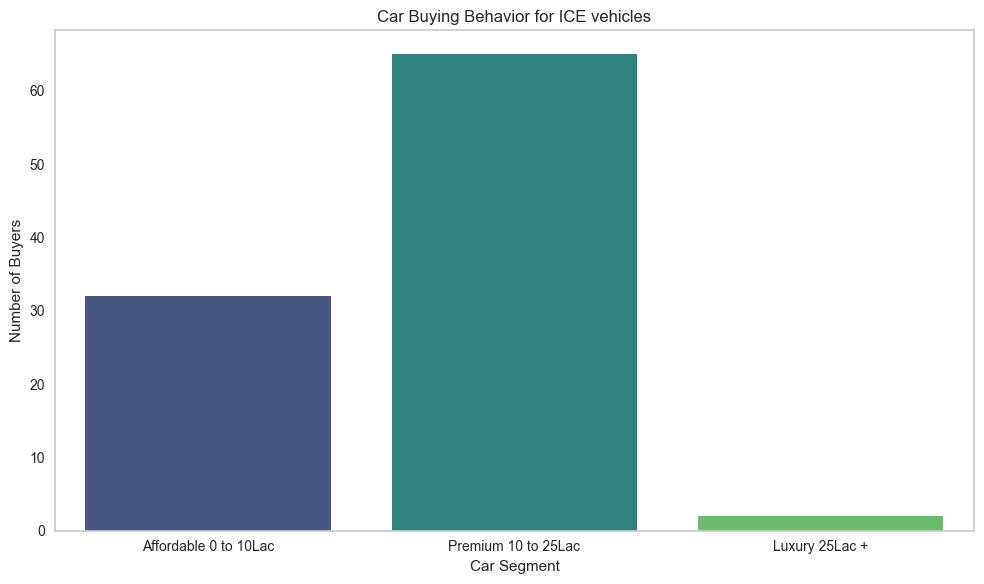

In [104]:
price_ranges = {
    'Affordable 0 to 10Lac': (0, 1000000),
    'Premium 10 to 25Lac': (1000000, 2500000),
    'Luxury 25Lac +': (2500000, 10000000)  # Adjust the upper limit based on your data
}

# Count the number of buyers in each price range
price_preference = {style: 0 for style in price_ranges.keys()}

for style, (lower, upper) in price_ranges.items():
    price_preference[style] = indian_buying_behaviour[(indian_buying_behaviour['Price'] >= lower) & 
                                                       (indian_buying_behaviour['Price'] < upper)].shape[0]

# Create a DataFrame for visualization
price_preference_df = pd.DataFrame(list(price_preference.items()), columns=['Style', 'Number of Buyers'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Style', y='Number of Buyers', data=price_preference_df, palette='viridis')
plt.xlabel('Car Segment')
plt.ylabel('Number of Buyers')
plt.title('Car Buying Behavior for ICE vehicles')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

In [89]:
EV4 = EV4.drop(EV4.index[-1])

EV4['Price Mean'] = (EV4['Price Range From'] + EV4['Price Range To']) / 2

X = EV4[['Price Mean']]

kmeans = KMeans(n_clusters=3, random_state=42)
EV4['Cluster'] = kmeans.fit_predict(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


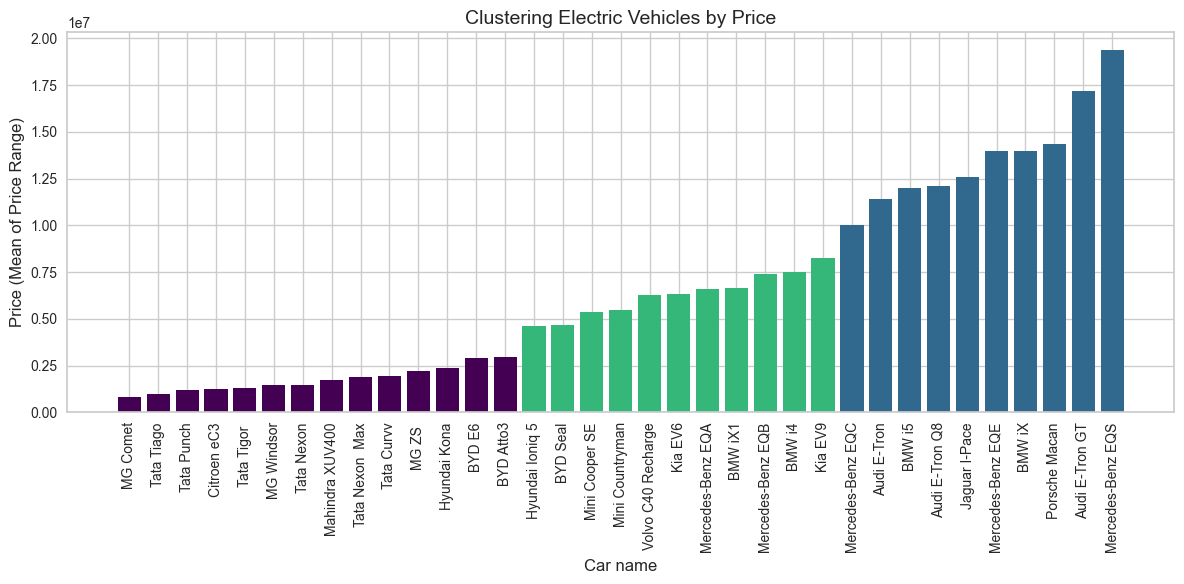

In [90]:
plt.figure(figsize=(12, 6))

EV4_sorted = EV4.sort_values('Price Mean')

plt.bar(EV4_sorted['Car'], EV4_sorted['Price Mean'], color=plt.cm.viridis(EV4_sorted['Cluster'] / 3))
plt.xlabel('Car name', fontsize=12)
plt.ylabel('Price (Mean of Price Range)', fontsize=12)
plt.title('Clustering Electric Vehicles by Price', fontsize=14)
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
# Checking for null values in each column
null_values = EV1.isnull().sum()

# Checking total number of null values in the entire DataFrame
total_null_values = EV1.isnull().sum().sum()
print("\nTotal Null Values in the DataFrame:", total_null_values)


Total Null Values in the DataFrame: 0


In [38]:
EV1['total-charging-stations'].fillna(EV1['total-charging-stations'].mean(), inplace=True)

EV1.isnull().sum()

State Name                        0
Two Wheeler                       0
Three Wheeler                     0
Four Wheeler                      0
Goods Vehicles                    0
Public Service Vehicle            0
Special Category Vehicles         0
Ambulance/Hearses                 0
Construction Equipment Vehicle    0
Other                             0
Grand Total                       0
total-charging-stations           0
dtype: int64

In [41]:
#Top States by EV Adoption
top_states = EV1[['State Name', 'Grand Total']].sort_values(by='Grand Total', ascending=False).head(5)

# Display without the index
print("\nTop 5 States by EV Adoption:\n")
print(top_states.to_string(index=False))


Top 5 States by EV Adoption:

   State Name  Grand Total
Uttar Pradesh       276217
        Delhi       132302
    Karnataka        82046
        Bihar        64241
  Maharashtra        58815


In [42]:
#Total EV Distribution by Vehicle Type
vehicle_distribution = EV1[['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 
                                'Public Service Vehicle']].sum()
print("Total Vehicle Distribution:\n", vehicle_distribution)

Total Vehicle Distribution:
 Two Wheeler               282542
Three Wheeler             647186
Four Wheeler               26335
Goods Vehicles              3036
Public Service Vehicle      2039
dtype: int64


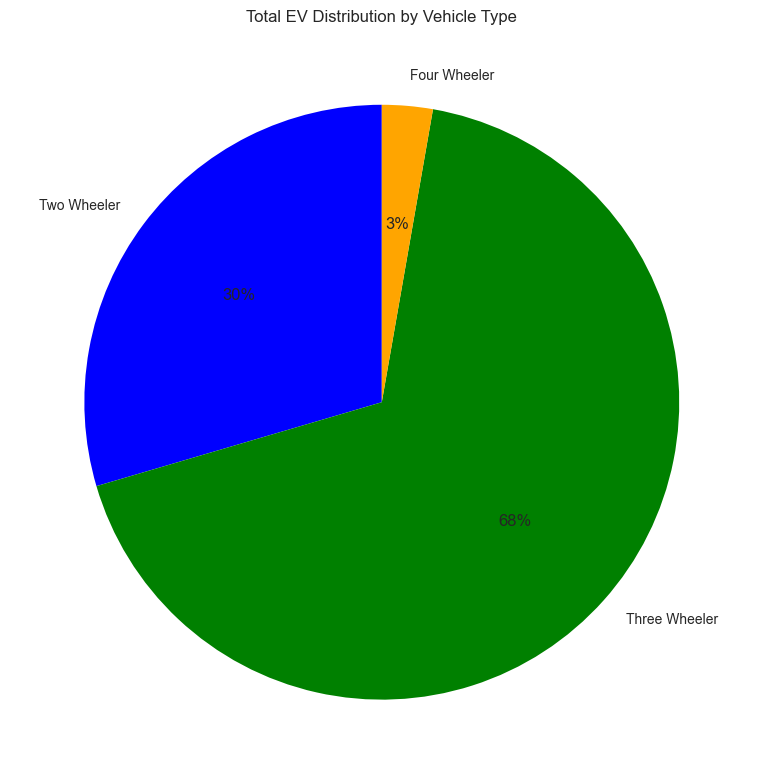

In [62]:
# Total EV Distribution by Vehicle Type
vehicle_distribution = EV1[['Two Wheeler', 'Three Wheeler', 'Four Wheeler']].sum()
#'Public Service Vehicle', 'Goods Vehicles'
labels = vehicle_distribution.index
plt.figure(figsize=(8, 8))
plt.pie(vehicle_distribution, labels=labels, autopct='%1.0f%%', startangle=90, colors=['blue', 'green', 'orange', 'lightcoral', 'gold'])
plt.title('Total EV Distribution by Vehicle Type')
plt.tight_layout()
plt.show()

# Top 5 States by Total Electric Vehicles

In [71]:
top_5_states

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle
32,Grand Total,1334385,278169631
30,Uttar Pradesh,337180,40092490
6,Delhi,156393,7685600
13,Karnataka,120532,26870303
16,Maharashtra,116646,31058990


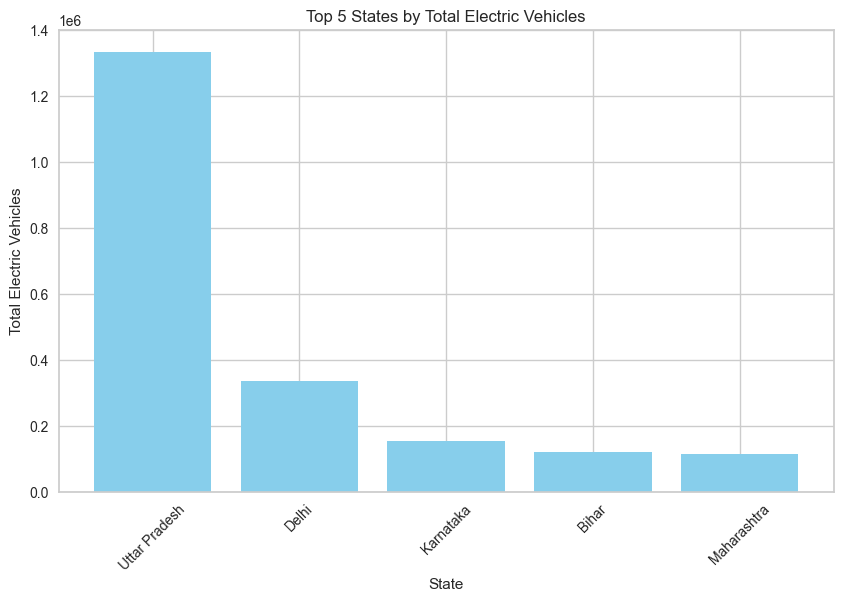

In [73]:
# Top 5 States by EVs
plt.figure(figsize=(10, 6))
plt.bar(top_states['State Name'], top_5_states['Total Electric Vehicle'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Electric Vehicles')
plt.title('Top 5 States by Total Electric Vehicles')
plt.xticks(rotation=45)
plt.show()

Calculating EV Penetration

In [91]:
EV3 = EV3.drop(EV3.index[-1])

EV3['EV Penetration (%)'] = (EV3['Total Electric Vehicle'] / EV3['Total']) * 100

df_sorted = EV3.sort_values(by='EV Penetration (%)', ascending=False)

df_top10 = df_sorted.head(10)

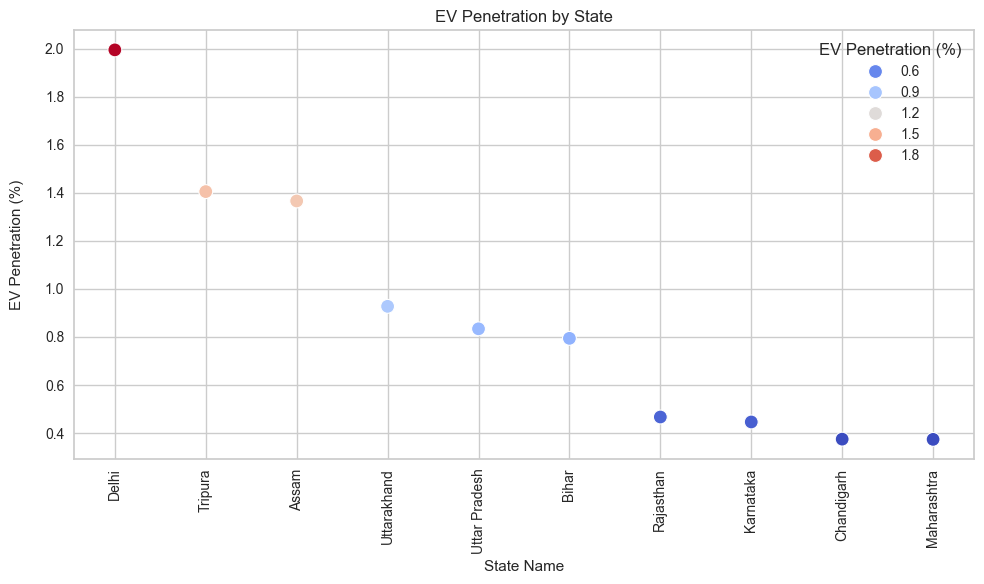

In [92]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top10, x='State Name', y='EV Penetration (%)', hue='EV Penetration (%)', palette='coolwarm', s=100)
plt.title('EV Penetration by State')
plt.xticks(rotation=90)
plt.ylabel('EV Penetration (%)',  labelpad=15, loc='center')
plt.tight_layout()
plt.show()

**Exploratory Data Analysis**


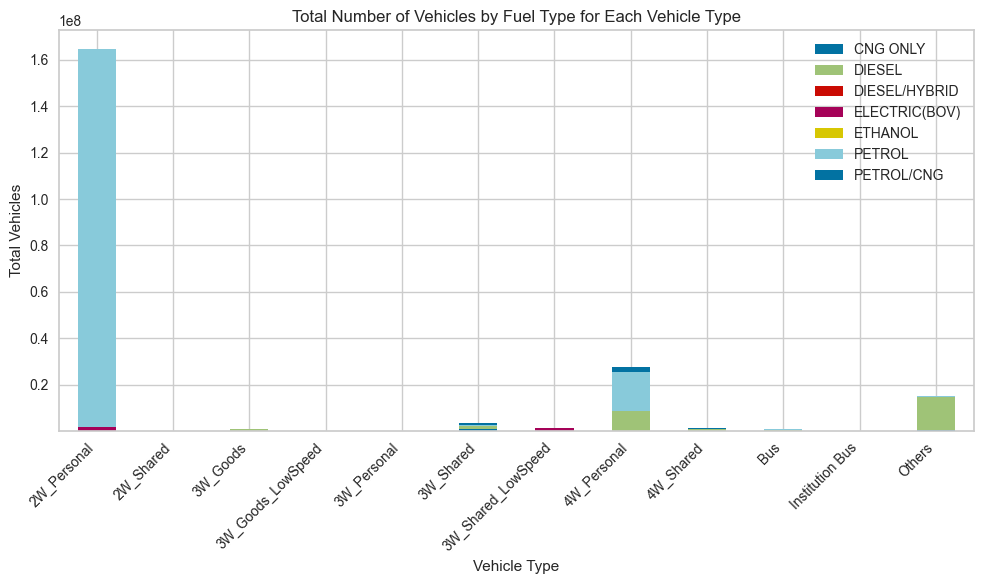

In [94]:
# Aggregating data by Vehicle Type and Fuel Type
fuel_columns = ['CNG ONLY', 'DIESEL', 'DIESEL/HYBRID', 'ELECTRIC(BOV)', 'ETHANOL', 'PETROL', 'PETROL/CNG']
fuel_data = Main.groupby('Vehicle Type')[fuel_columns].sum()
fuel_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Number of Vehicles by Fuel Type for Each Vehicle Type')
plt.ylabel('Total Vehicles')
plt.xlabel('Vehicle Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

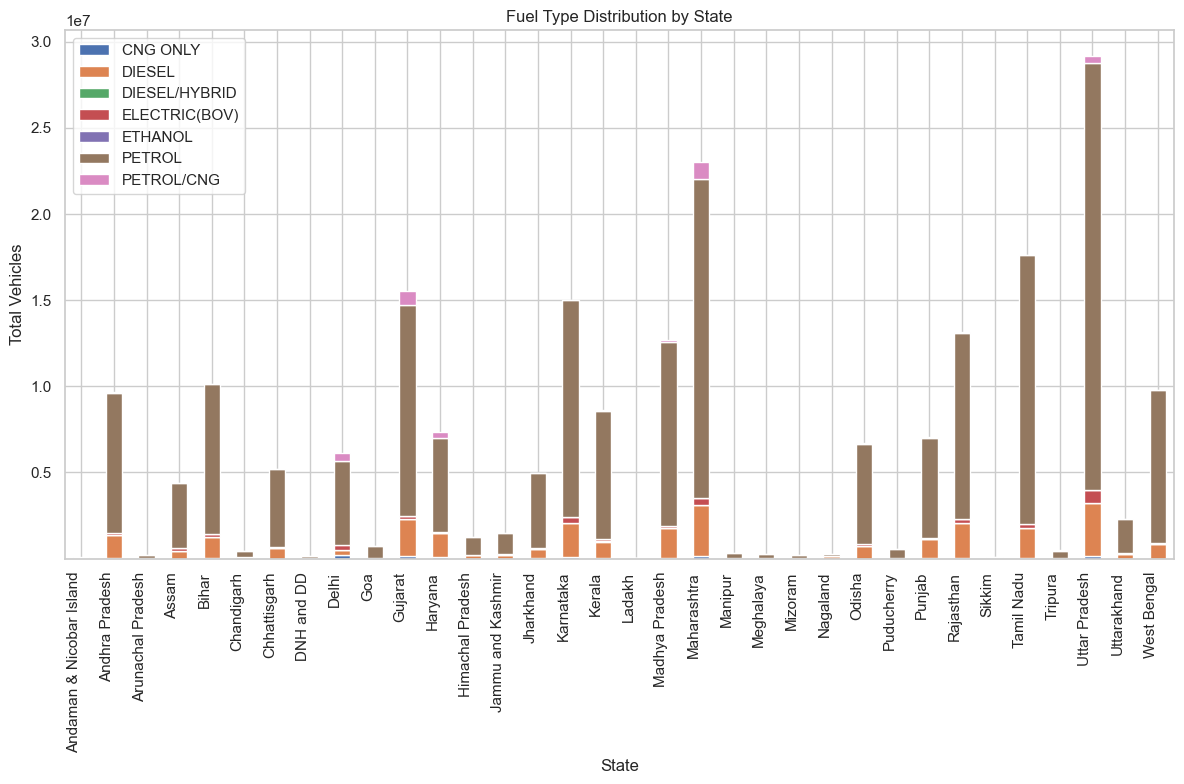

In [201]:
# Aggregating data by State and fuel type
fuel_by_state = Main.groupby('State')[fuel_columns].sum()
fuel_by_state.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Fuel Type Distribution by State')
plt.ylabel('Total Vehicles')
plt.xlabel('State')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [95]:
# Aggregating EV adoption
state_ev_data = Main.groupby('State').agg({'ELECTRIC(BOV)': 'sum','Total': 'sum'}).reset_index()
# Calculating EV adoption rate as the ratio of electric vehicles to the total number of vehicles
state_ev_data['EV_Adoption_Rate'] = (state_ev_data['ELECTRIC(BOV)'] / state_ev_data['Total']) * 100
state_ev_data_sorted = state_ev_data.sort_values(by='EV_Adoption_Rate', ascending=False)

In [96]:
state_ev_data_sorted[['State', 'EV_Adoption_Rate']].head(5)

,State,EV_Adoption_Rate
8,Delhi,4.344902
30,Tripura,3.823860
3,Assam,3.416996
5,Chandigarh,2.492514
31,Uttar Pradesh,2.491483


In [97]:
# Selecting numeric columns for PCA (excluding categorical)
numeric_data = Main.select_dtypes(include=['float64', 'int64'])

# Standardizing the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Performing PCA to explain 95% variance
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

# How much variance is explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Total number of components selected
n_components = pca.n_components_

print("explained_variance_ratio: ",np.cumsum(explained_variance_ratio))
print()
print("n_components: ",n_components)

explained_variance_ratio:  [0.12713858 0.22822711 0.30506318 0.36979125 0.42488231 0.47779089
 0.53042519 0.58305754 0.6356866  0.68812449 0.74022181 0.78970772
 0.83836847 0.88007114 0.91583486 0.94916537 0.97726609]

n_components:  17


In [98]:
# Convert the PCA-transformed data back to a DataFrame for easier interpretation
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_transformed_df = pd.DataFrame(pca_data, columns=pca_columns)
pca_transformed_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.330746,-0.152961,-0.088766,0.049777,-0.063167,-0.025903,-0.003245,0.001124,-0.009879,0.013807,-0.023555,0.032352,-0.037888,0.059829,0.126025,0.038915,0.015925
1,-0.333865,-0.158736,-0.088593,0.050239,-0.063176,-0.026517,-0.003242,0.001147,-0.009887,0.014315,-0.024688,0.030975,-0.041411,0.059873,0.136302,0.040488,0.019067
2,-0.304304,-0.169625,-0.088572,0.043106,-0.070016,-0.026633,-0.003297,0.001158,-0.009915,0.014485,-0.025465,0.038695,-0.045000,0.047886,0.136382,0.045445,0.019773
3,-0.328510,-0.161111,-0.088579,0.048930,-0.064458,-0.026574,-0.003252,0.001151,-0.009893,0.014376,-0.024899,0.032341,-0.042288,0.057630,0.136914,0.041508,0.019382
4,-0.333990,-0.159183,-0.088580,0.050248,-0.063199,-0.026561,-0.003241,0.001149,-0.009888,0.014352,-0.024771,0.030903,-0.041674,0.059836,0.137034,0.040616,0.019293


#### The PCA analysis selected 17 components to explain 95% of the variance in the dataset, demonstrating that a substantial reduction in dimensionality was achieved while retaining most of the information.


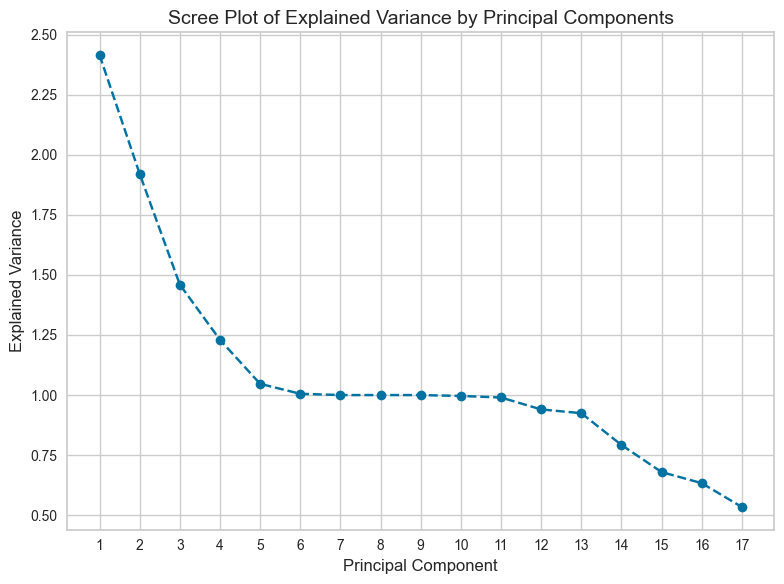

In [208]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 18), pca.explained_variance_, marker='o', linestyle='--', color='b')
plt.title('Scree Plot of Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 18))  # Ensures all components are visible
plt.tight_layout()
plt.show()

In [102]:
pca_reduced_df=pca_transformed_df.iloc[:,:6]
pca_reduced_df.sample(5)

,PC1,PC2,PC3,PC4,PC5,PC6
6102,-0.333865,-0.158736,-0.088593,0.050239,-0.063176,-0.026517
48514,-0.315258,-0.142794,-0.090859,0.047140,-0.065173,-0.024996
96171,-0.333625,-0.159311,-0.088580,0.050161,-0.063283,-0.026561
48895,-0.326554,-0.146582,-0.088965,0.049099,-0.063299,-0.025204
83431,-0.333865,-0.158736,-0.088593,0.050239,-0.063176,-0.026517


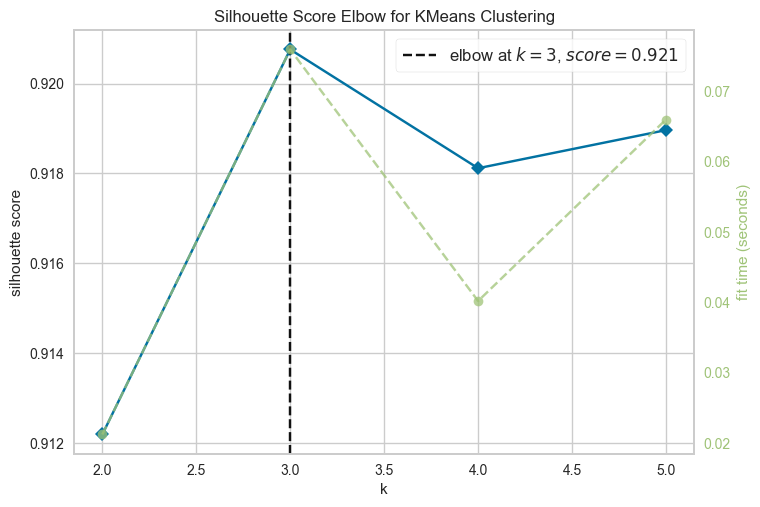

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [103]:
sampled_data = pca_reduced_df.sample(frac=0.5, random_state=2)  # Adjust frac as needed

# Create a KElbowVisualizer object using the silhouette score metric
k_elbow = KElbowVisualizer(KMeans(), k=(2, 6), metric='silhouette')

# Fit the visualizer to the sampled data
k_elbow.fit(sampled_data)

# Display the elbow plot
k_elbow.show()

In [ ]:
# Create a KMeans model with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_reduced_df)

# Predict the cluster labels
labels = kmeans.labels_

# Calculate the silhouette score
silhouette = silhouette_score(pca_reduced_df, labels)

print(f"The silhouette score for k=2 is: {silhouette}")

In [ ]:
# Create a KMeans model with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_reduced_df)

# Predict the cluster labels
labels = kmeans.labels_

# Calculate the silhouette score
silhouette = silhouette_score(pca_reduced_df, labels)

print(f"The silhouette score for k=3 is: {silhouette}")

In [ ]:
data['cluster']=labels
centroids = kmeans.cluster_centers_
centroids

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=data['cluster'], palette='viridis', data=pca_reduced_df, legend='full', s=100)
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*',color='red',ms=14)
plt.title('Cluster Visualization with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()